# **Deblurring using the least squares solution (no noise)**

In [1]:
#Importing necessary libraires
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.linalg import toeplitz

## **01_The forward problem**

In [2]:
#Generation of a synthetic image
image=np.zeros((32, 32))   #the image has dimensions of 32 x 32

#Adding two rectangles to the image
image[12:20, 15:22]=150
image[5:10, 2:10]=70
#Adding a triangle
for i in range(5):
  image[20+i, 5:6+i]=56

#Adding a circlar forme
x_center, y_center= 25,25
radius=5
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if (i-x_center)**2+(j-y_center)**2<=radius**2:
      image[i , j]=100

#Normalization of the image
image=image/np.max(image)

In [3]:
#Creation of the kernel of dimension 3, it will be used to blur the image
kernel=np.ones(3)/3

In [4]:
#Construction of Toeplitz matrix from the 1d kernel
def build_1d(n, kernel):
  """
  Construct an n x n Toeplitz matrix corresponding to the 1D convolution with the 1D kernel
  Parameters:
  n:size of the image we want to blur
  kernel: a 1D convolution kernel
  """
  kernel=kernel.flatten()
  k=len(kernel)                   #getting the kernel length
  center=k//2                     #Getting the indice of the center of the kernel
  r=np.zeros(n)                   #Creation of a 'row' that only contains zeros
  c=np.zeros(n)                   #Creation of a 'column' that only contains zeros

  #Filling the row r nd the column c with the kernel elements to form the toeplitz matrix
  for i in range(k):
    shift=i-center
    if shift >=0 :
      r[shift]=kernel[i]
    else:
      c[-shift]=kernel[i]
  return toeplitz (c, r)

In [5]:
# Construction of Toeplitz matrices corresponding to 1D convolution
# T  : Toeplitz matrix for row-wise convolution (horizontal blur)
# TT : Toeplitz matrix for column-wise convolution (vertical blur)
T=build_1d(image.shape[0], kernel)
TT=build_1d(image.shape[0], kernel.T)

In [6]:
# Build the big (Kronecker) matrix H that represents the 2D convolution as a matrix multiplication.
H=np.kron(T, TT)

In [7]:
#Blurring the image
blur=H@image.reshape(-1 , 1)  #Blurring is done by applying 2D convolution
                              #the dot product of Kronecker matrix with the flatten image  vector simulates this convolution

Text(0.5, 1.0, 'Blur image')

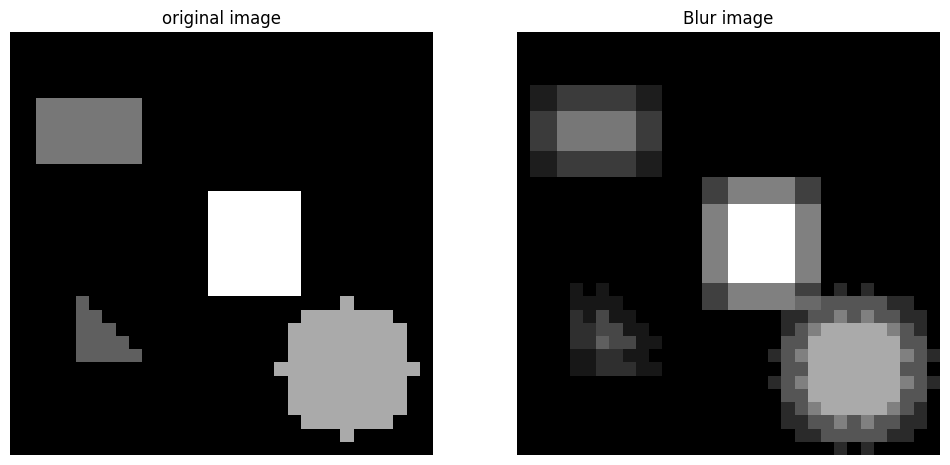

In [8]:
#Visualization of the original and the blur images
plt.figure(figsize=(12 , 6))
plt.subplot(1 , 2 , 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('original image')
plt.subplot(1 , 2 , 2)
plt.imshow(blur.reshape(image.shape[0] , image.shape[1]), cmap='gray')
plt.axis('off')
plt.title('Blur image')

# **02_Problem solution (inverse problem)**

In [32]:
#Least squarres solution
x=np.linalg.inv(H.T@H)@H.T@blur
reconstructed_image=x.reshape(image.shape)

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

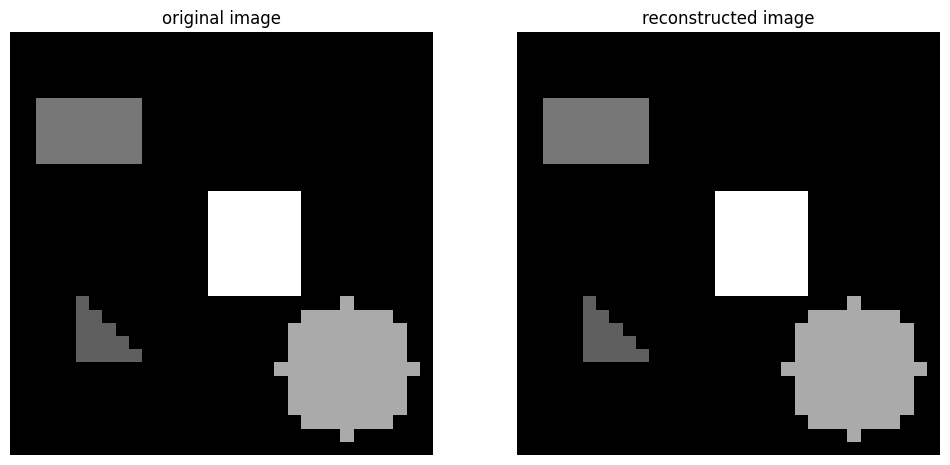

In [33]:
plt.figure(figsize=(12 , 6))
plt.subplot(1 , 2 , 1)
plt.imshow(image, cmap='gray')
plt.title('original image')
plt.axis('off')
plt.subplot(1 , 2 , 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('reconstructed image')
plt.axis('off')

In [34]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(image, reconstructed_image)
print(f"MSE={mse:.2f}")

MSE=0.00
